# Pymaceuticals Inc.
---

### Analysis

- The aim of this study is to compare the Capomulin treatment with other regimens to see which treatment provided better results in reducing the tumor size in a group of 249 mice over 45 days. The bar plot show that Capomulin and Ramicane had higher amount of timepoints observed, which could suggest that these two drugs had more consistent observations during the study. The pie chart shows there was equal representation of males and females in the study. The line plot shows how the tumor volume of the single mouse (mouse id l509) over the period of the 45 days with the Capomulin treatment. The box plot for Capomulin shows a smaller interquartile range and lower median which could suggest that it is the better treatment in reducing tumor size. The scatter plot shows how there’s a positive correlation between the final tumor volume and the weight of the mice, and is supported by the strong correlation coefficient of 0.84. Overall Capomulin and Ramicane both showed better reductions results in tumor size, compared to Infubinol and Ceftamin. Ceftamin shows that it is the least effective, displaying larger tumor volumes over time with lower control over metastatic sites.

- A couple of limitations of this to study to note are the sample size and the treatment days. The sample size is relatively small which affects its ability to be generalized. The treatment duration is not long enough to observe whether if any of treatment regimens perform better over an extended period time or to detect any side effects of each regimen might display. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

metadata_study_combined = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
metadata_study_combined.head()   #doesn't look like data from in starter


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = metadata_study_combined["Mouse ID"].nunique()
mice_number  

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_timepoints = metadata_study_combined[metadata_study_combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
double_MiceID = duplicate_timepoints['Mouse ID'].unique()


double_MiceID   

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = metadata_study_combined[metadata_study_combined['Mouse ID'] == 'g989']

duplicate_mouse_data #this looks right for the most part

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_metadata_study = metadata_study_combined.drop(duplicate_mouse_data.index)

clean_metadata_study.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_metadata_study['Mouse ID'].nunique()
clean_mice  

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = metadata_study_combined.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Std_Dev=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem'))

summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

summary_statistics 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_metadata_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


  
summary_stats 



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

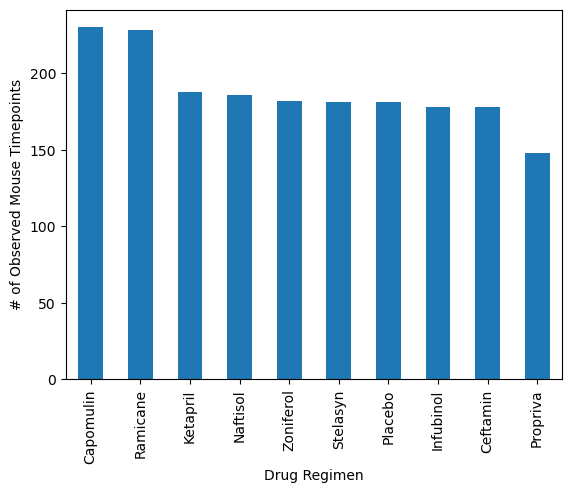

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_metadata_study['Drug Regimen'].value_counts() 

drug_regimen.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


plt.show() 

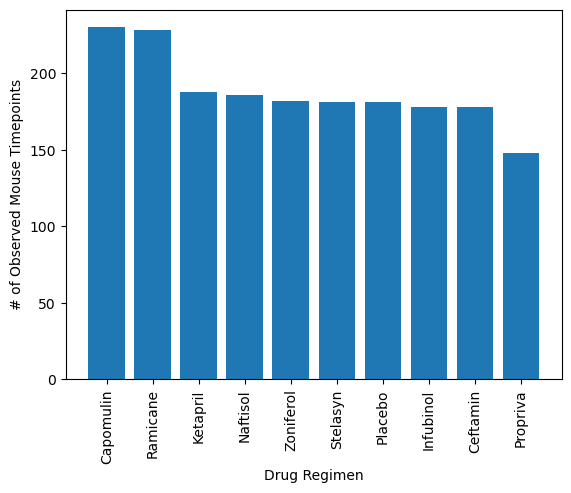

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen.index, drug_regimen.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show() 

<Axes: ylabel='count'>

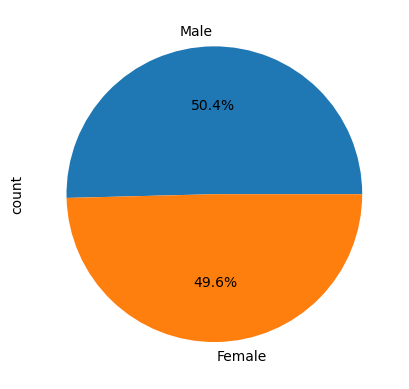

In [11]:

# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_metadata_study.drop_duplicates(subset=['Mouse ID', 'Sex'])
# Get the unique mice with their gender

gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct="%1.1f%%")


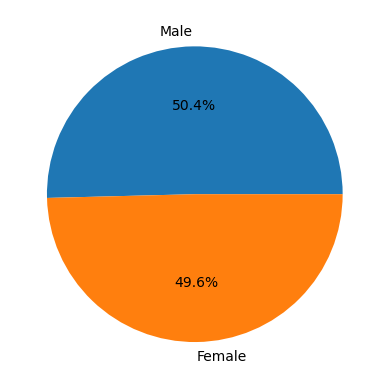

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

# Make the pie chart

plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%") 


plt.show()  #why does count not show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = metadata_study_combined.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_df, metadata_study_combined, on=['Mouse ID', 'Timepoint'], how='inner')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

 # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']


# add subset
    tumor_vol_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)


    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


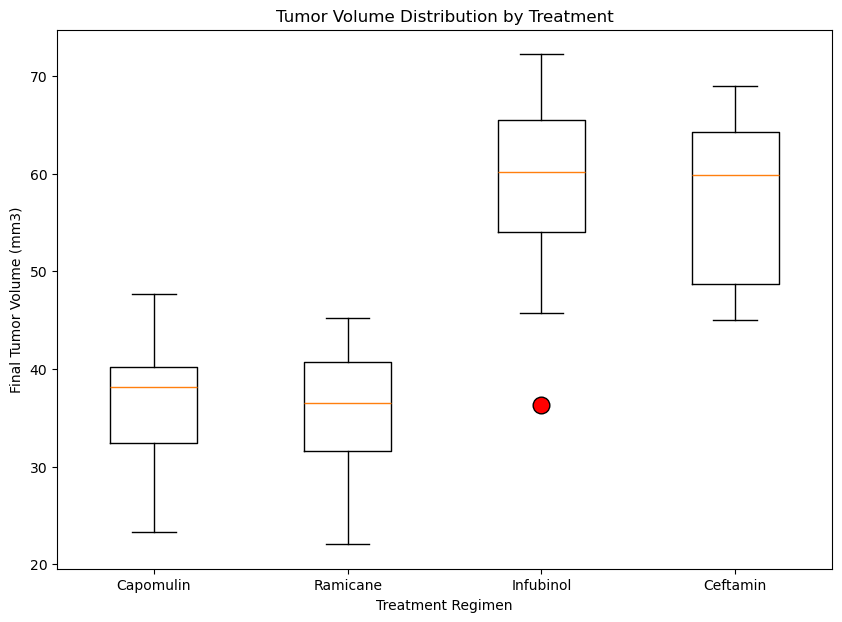

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 7))  # Optional: Adjust the figure size
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor="red", markersize=12))
plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

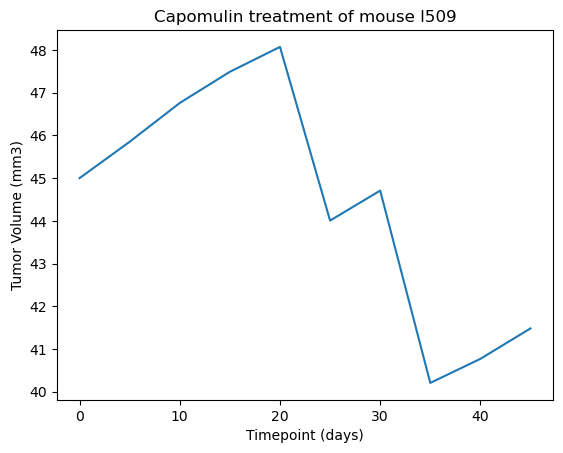

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'

single_mouse_treated = clean_metadata_study.loc[clean_metadata_study['Drug Regimen'] == "Capomulin"]
mousedata = single_mouse_treated.loc[single_mouse_treated['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


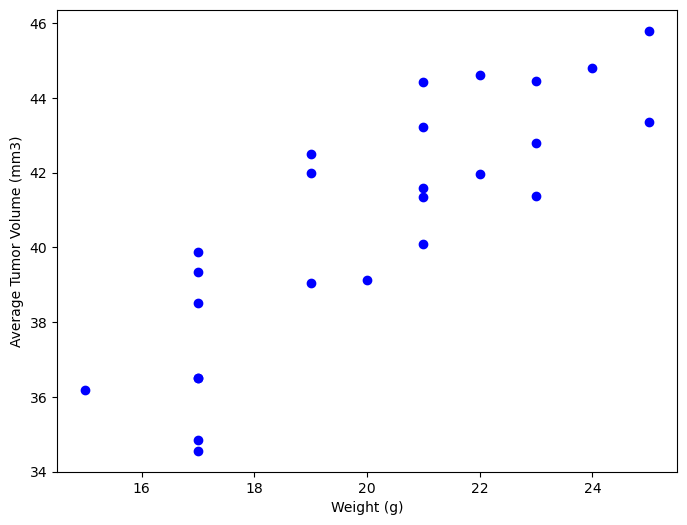

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_metadata_study[clean_metadata_study['Drug Regimen'] == 'Capomulin']

avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

capomulin_weight_vs_volume = pd.DataFrame({
    'Weight (g)': mouse_weight,
    'Average Tumor Volume (mm3)': avg_tumor_vol})

plt.figure(figsize=(8, 6))
plt.scatter(capomulin_weight_vs_volume['Weight (g)'], 
            capomulin_weight_vs_volume['Average Tumor Volume (mm3)'], 
            color='blue')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


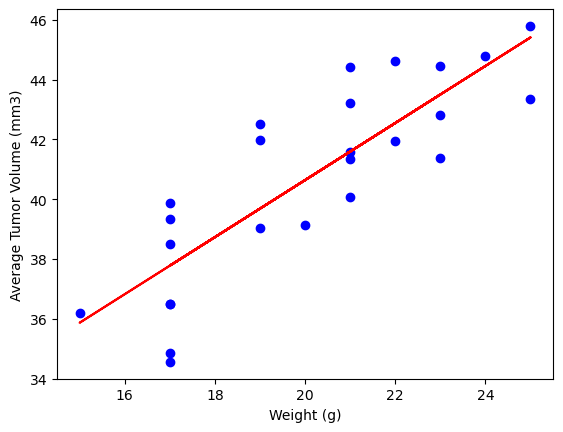

In [18]:
# Calculate the correlation coefficient and a linear regression model
correlation_coefficient = round(np.corrcoef(capomulin_weight_vs_volume['Weight (g)'], 
                                      capomulin_weight_vs_volume['Average Tumor Volume (mm3)'])[0, 1], 2)


print(f"The correlation between mouse weight and the average tumor volume is: {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_weight_vs_volume['Weight (g)'], 
                                                            capomulin_weight_vs_volume['Average Tumor Volume (mm3)'])


regression_line = slope * capomulin_weight_vs_volume['Weight (g)'] + intercept

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.scatter(capomulin_weight_vs_volume['Weight (g)'], 
            capomulin_weight_vs_volume['Average Tumor Volume (mm3)'], 
            color='blue')


plt.plot(capomulin_weight_vs_volume['Weight (g)'], regression_line, color='red', label='Regression Line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()
